In [20]:
#Json: to save and read data from our file
#Requests: to fetch data from the API that we found on an open source "cvrapi.dk", public api's.
#Pandas: We use pandas to work with data in a table format
#Streamlit: Is used to build the application(remember to download streamlit in the terminal). To open it in the browser, write: streamlit run stremlit_app.py (<- the files name), in the terminal.
#matplotlib:Creating charts.
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Reads from the url and stores the response in a json file
def readAPI(url, params, headers, myfile):
    list = []
    
    # Prepares the request to see the full URL being used
    prepared_request = requests.Request('GET', url, params=params).prepare()
    print("Request URL:", prepared_request.url)
    
    # Sends the request and get response as JSON
    response = requests.get(url, params=params, headers=headers).json()
    list.append(response)
    
    # Save the JSON response to a file      
    with open(myfile, 'w', encoding='utf-8') as f:
        json.dump(list, f)
    return


In [22]:
company = "Novo nordisk"

# Cleaning up company name (remove spaces at start and end)
company = company.strip()

# API settings happens here
user = 'user'

url = 'https://cvrapi.dk/api'
params = {'search': company, 'country': 'dk'}
headers = {'User-Agent': user}

# The name of the file name where we want to save the API response
myfile = 'apitest.json'


In [23]:
# We call function to get the API data and save it
response = readAPI(url, params, headers, myfile)


Request URL: https://cvrapi.dk/api?search=Novo+nordisk&country=dk


In [24]:
# and then reads the saved JSON file into pandas DataFrame
df = pd.read_json(myfile)
df


,vat,name,address,zipcode,city,cityname,protected,phone,email,fax,...,industrydesc,companycode,companydesc,creditstartdate,creditbankrupt,creditstatus,owners,productionunits,t,version
0,24256790,NOVO NORDISK A/S,Novo Alle 1,2880,Bagsværd,NaN,False,44448888,NaN,NaN,...,Fremstilling af farmaceutiske præparater,60,Aktieselskab,NaN,False,NaN,NaN,"[{'pno': 1017661031, 'main': False, 'name': 'N...",100,6


In [25]:
# Normalize JSON data (flatten it into table format) so we dont end up with a long list of info
with open(myfile, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Takes the first element from the list
response_data = data[0]

# Normalize JSON data to flat table
df_normalized = pd.json_normalize(response_data)
df_normalized


,vat,name,address,zipcode,city,cityname,protected,phone,email,fax,...,industrydesc,companycode,companydesc,creditstartdate,creditbankrupt,creditstatus,owners,productionunits,t,version
0,24256790,NOVO NORDISK A/S,Novo Alle 1,2880,Bagsværd,None,False,44448888,None,None,...,Fremstilling af farmaceutiske præparater,60,Aktieselskab,None,False,None,None,"[{'pno': 1017661031, 'main': False, 'name': 'N...",100,6


In [26]:
# Selects specific columns 
selected_columns = ['vat', 'name', 'employees', 'address', 'zipcode', 'city', 'industrydesc']
df_selected = df_normalized[selected_columns]

# Shows the selected DataFrame
df_selected


,vat,name,employees,address,zipcode,city,industrydesc
0,24256790,NOVO NORDISK A/S,32792,Novo Alle 1,2880,Bagsværd,Fremstilling af farmaceutiske præparater


In [28]:
#Safes and clearns data to CSV
csv_path = '../APIFolder/selected_company_data.csv' 
df_selected.to_csv(csv_path, index=False, encoding='utf-8-sig')

print(f"CSV file saved to: {csv_path}")


CSV file saved to: ../APIFolder/selected_company_data.csv


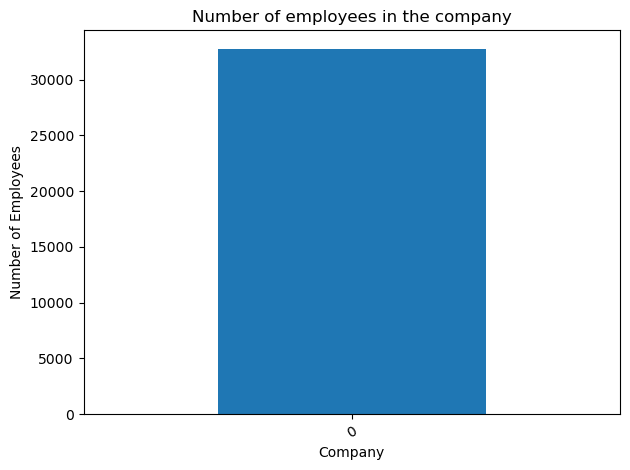

In [29]:
# Plots number of employees on their position
df_selected['employees'].plot(kind='bar', title='Number of employees in the company')
plt.xlabel('Company')
plt.ylabel('Number of Employees')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()